In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

In [8]:
df = pd.read_csv(r"C:\Users\nisti\OneDrive\Desktop\data\Experimantal Datasets\WarInUkraine\missile_attacks_daily.csv")
df.head(15)     

,time_start,time_end,model,launch_place,target,carrier,launched,destroyed,not_reach_goal,cross_border_belarus,back_russia,still_attacking,affected region,destroyed_details,launched_details,launch_place_details,source
0,2025-04-05 05:30,2025-04-06 06:20,X-101/X-555,Saratov oblast,Ukraine,Tu-95MS,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kpszsu/posts/pfbid02pyzebKrwSFj1ZGi4mWjutryUFc...
1,2025-04-06 05:00,2025-04-06 05:15,Kalibr,Bryansk oblast,Kyiv oblast,NaN,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kpszsu/posts/pfbid02pyzebKrwSFj1ZGi4mWjutryUFc...
2,2025-04-05 20:00,2025-04-06 04:30,Shahed-136/131,"Primorsko-Akhtarsk and Chauda, Crimea and Kurs...",Ukraine,NaN,109.0,40.0,53.0,NaN,NaN,NaN,"['Sumy oblast', 'Kyiv oblast', 'Kharkiv oblast...",{'east': 16},NaN,NaN,kpszsu/posts/pfbid02pyzebKrwSFj1ZGi4mWjutryUFc...
3,2025-04-06 01:50,2025-04-06 03:00,Kalibr,Black Sea,Ukraine,Navi,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kpszsu/posts/pfbid02pyzebKrwSFj1ZGi4mWjutryUFc...
4,2025-04-04 21:00,2025-04-05 09:00,Shahed-136/131,"Primorsko-Akhtarsk and Chauda, Crimea and Brya...",Ukraine,NaN,92.0,51.0,31.0,NaN,NaN,NaN,"['Sumy oblast', 'Kyiv oblast', 'Dnipropetrovsk...","{'south': 3, 'east': 23, 'north': NaN, 'center...",NaN,NaN,kpszsu/posts/pfbid014VJsDMy6R5f8W1zN8XaALZZ72i...
5,2025-04-04 19:00,2025-04-04 19:00,Ballistic Missile,NaN,Kryvyi Rih,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://t.me/war_monitor/27083
6,2025-04-03 21:30,2025-04-04 08:30,Shahed-136/131,Primorsko-Akhtarsk and Kursk oblast and Bryans...,Ukraine,NaN,78.0,42.0,22.0,NaN,NaN,NaN,"['Kharkiv oblast', 'Kyiv oblast', 'Dnipropetro...","{'east': 34, 'north': NaN, 'center': NaN}",NaN,NaN,kpszsu/posts/pfbid02zfLHuLHDjejEtaeyzi4FFPRh6M...
7,2025-04-04,2025-04-04,Молнія,NaN,south,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PvKPivden/posts/pfbid035KJT4oGJM167tx84i8DcBKi...
8,2025-04-02 21:00,2025-04-03 09:00,Shahed-136/131,Primorsko-Akhtarsk and Kursk oblast and Millerovo,Ukraine,NaN,39.0,28.0,7.0,NaN,NaN,NaN,"['Kharkiv oblast', 'Donetsk oblast', 'Dniprope...","{'north': NaN, 'east': NaN}",NaN,NaN,kpszsu/posts/pfbid0rgcNzcjBppBEJXBT24EFU42e1XM...
9,2025-04-01 20:00,2025-04-02 09:00,Shahed-136/131,"Primorsko-Akhtarsk and Chauda, Crimea and Mill...",Ukraine,NaN,74.0,41.0,20.0,NaN,NaN,NaN,"['Kharkiv oblast', 'Donetsk oblast', 'Odesa ob...","{'south': 24, 'north': NaN, 'east': NaN}",NaN,NaN,kpszsu/posts/pfbid02oXFAveMDyx4AawEkxY8vayGbGY...


In [10]:
# Handle missing values
# Let's fill missing values in numeric columns with their mean
df['launched'] = df['launched'].fillna(df['launched'].mean())
df['destroyed'] = df['destroyed'].fillna(df['destroyed'].mean())
df['not_reach_goal'] = df['not_reach_goal'].fillna(df['not_reach_goal'].mean())
df['cross_border_belarus'] = df['cross_border_belarus'].fillna(df['cross_border_belarus'].mean())
df['back_russia'] = df['back_russia'].fillna(df['back_russia'].mean())
df['still_attacking'] = df['still_attacking'].fillna(df['still_attacking'].mean())

# Convert 'time_start' and 'time_end' to datetime
df['time_start'] = pd.to_datetime(df['time_start'], errors='coerce')
df['time_end'] = pd.to_datetime(df['time_end'], errors='coerce')

# Check for duplicates and drop them if necessary
df.drop_duplicates(inplace=True)

# If necessary, convert certain columns to categories for efficiency
df['model'] = df['model'].astype('category')
df['launch_place'] = df['launch_place'].astype('category')
df['target'] = df['target'].astype('category')
df['carrier'] = df['carrier'].astype('category')
df['affected region'] = df['affected region'].astype('category')


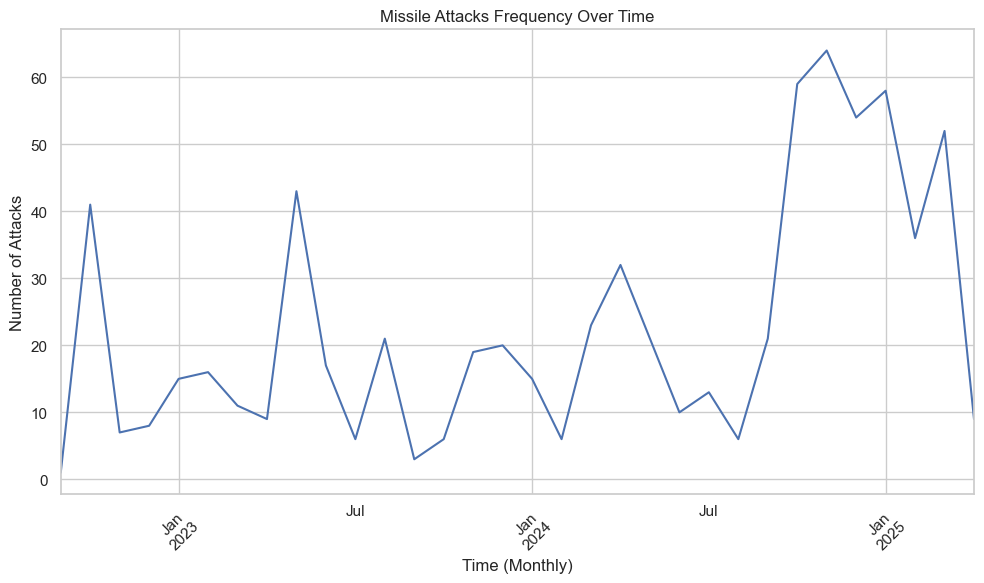

In [37]:
# Count attacks over time (based on 'time_start')
df['year_month'] = df['time_start'].dt.to_period('M')

# Count attacks per month
monthly_attacks = df.groupby('year_month').size()

# Plotting the number of attacks over time
plt.figure(figsize=(10, 6))
monthly_attacks.plot(kind='line', color='b')
plt.title('Missile Attacks Frequency Over Time')
plt.xlabel('Time (Monthly)')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
# Save the plot as a PNG image
plt.savefig('missile_attacks_over_time.png', format='png', bbox_inches='tight')
plt.show()

C:\Users\nisti\AppData\Local\Temp\ipykernel_3416\3708945082.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<function matplotlib.pyplot.show(close=None, block=None)>

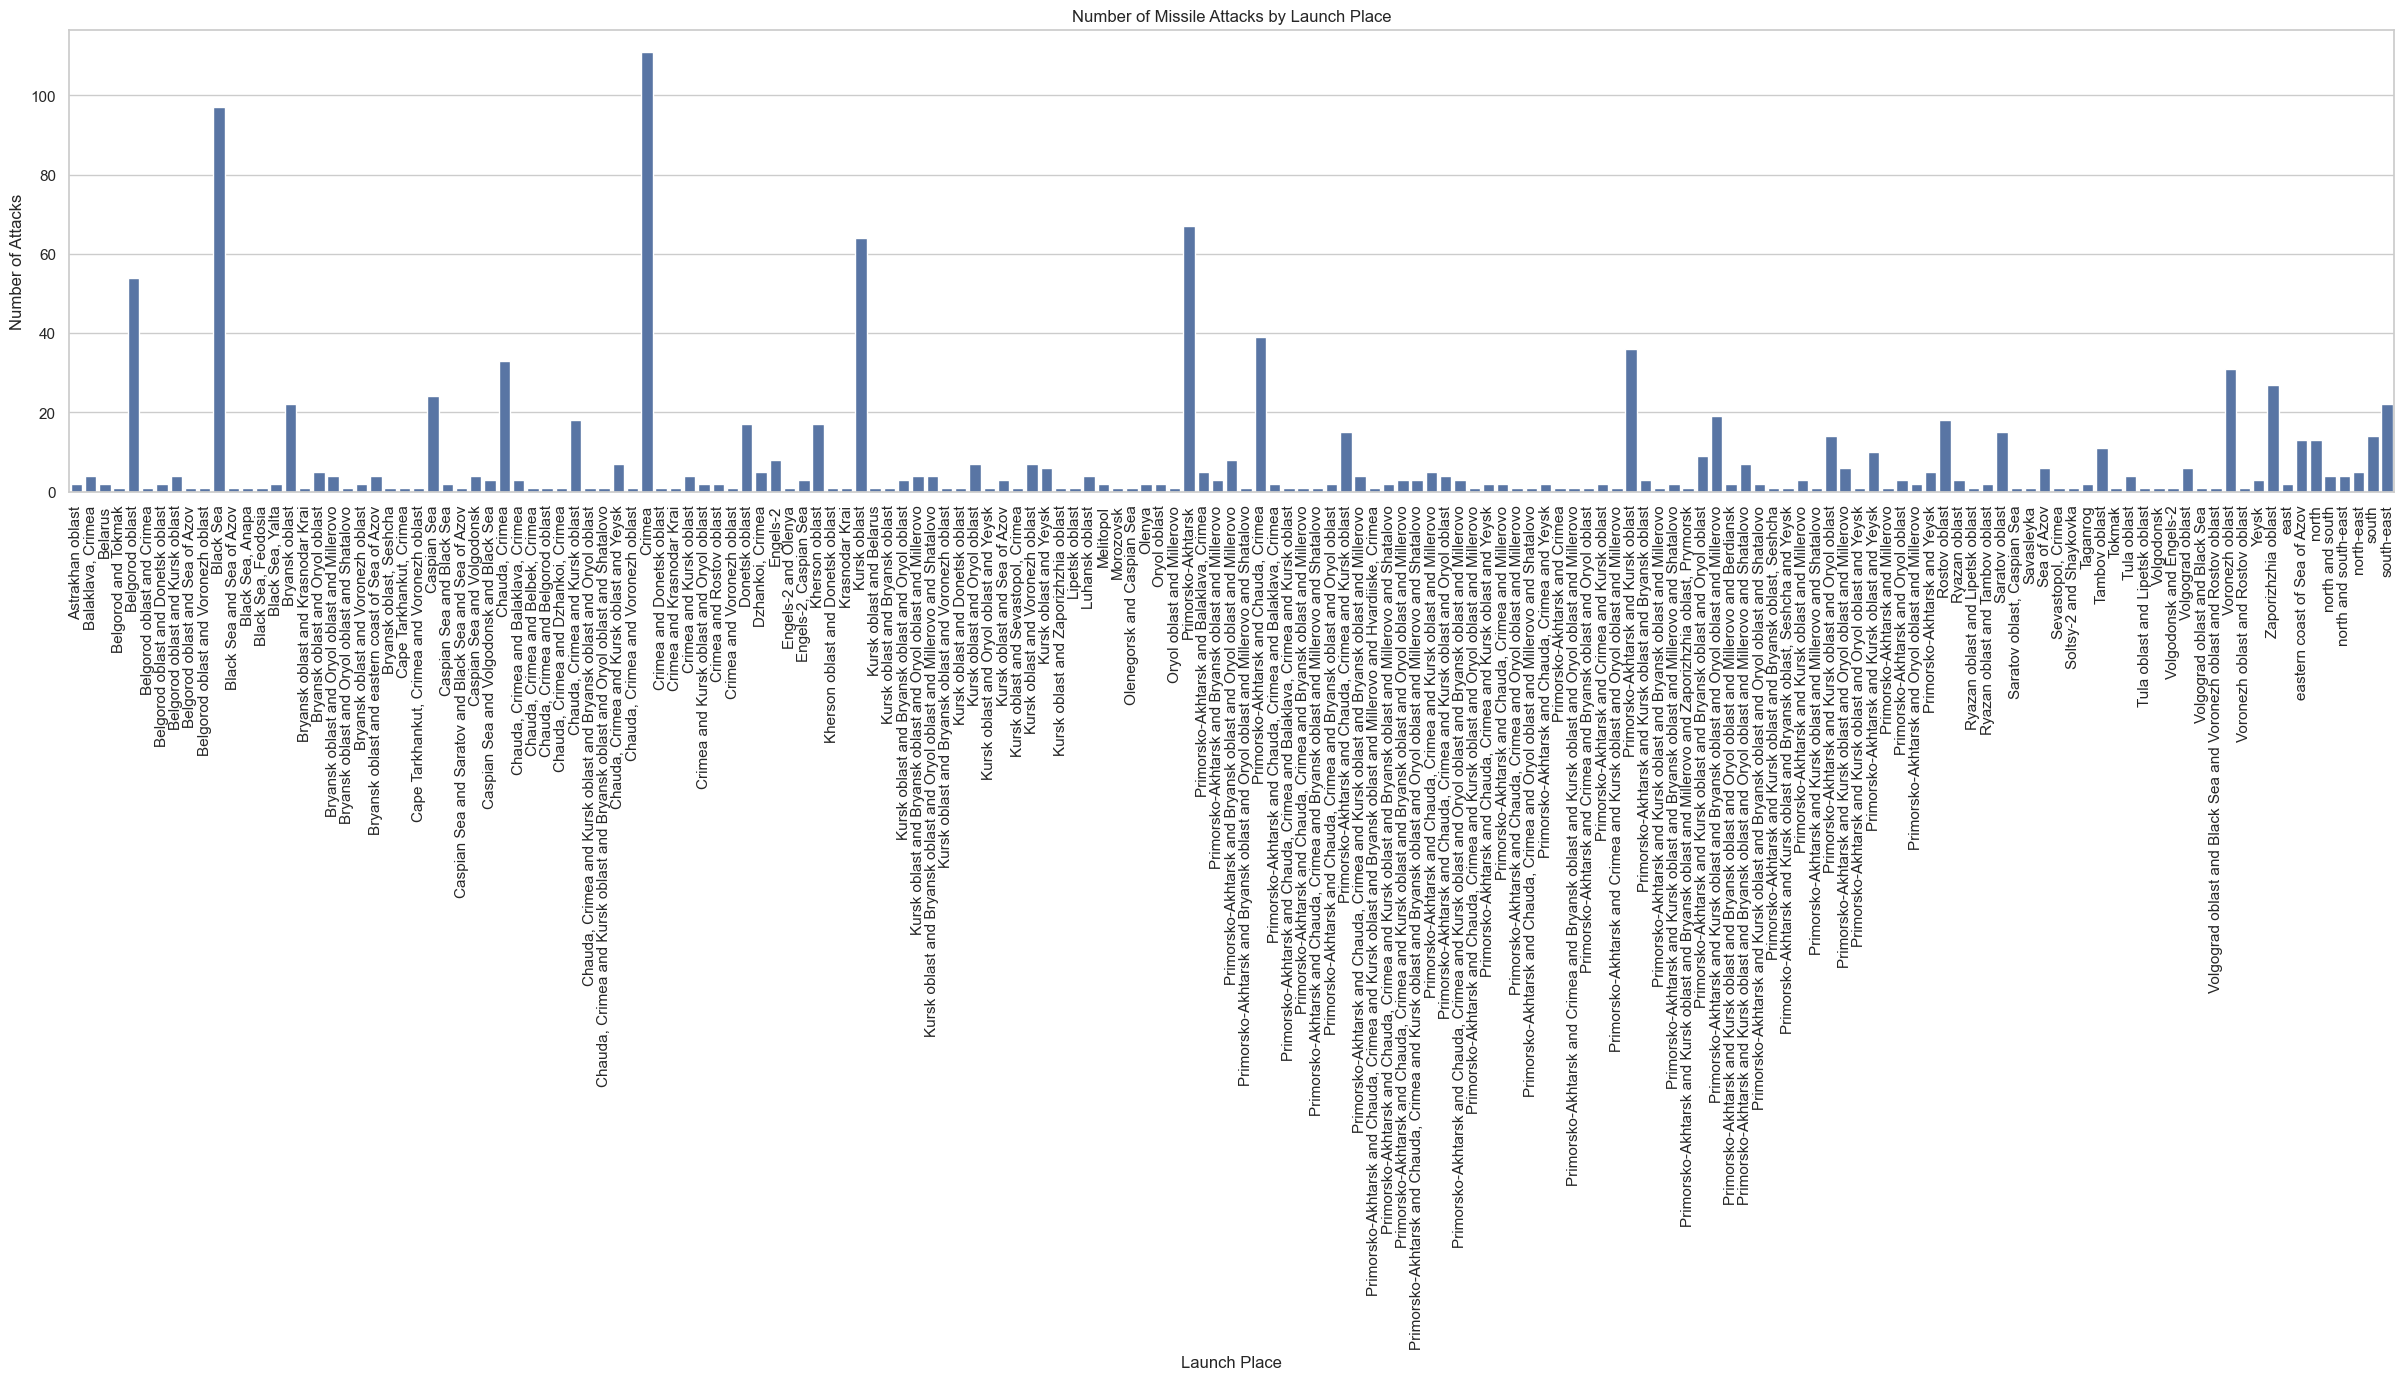

In [39]:
# Count the number of attacks by 'launch_place'
launch_place_counts = df['launch_place'].value_counts()

# Plotting a bar chart for the number of attacks by launch place
plt.figure(figsize=(30, 6))
sns.barplot(x=launch_place_counts.index, y=launch_place_counts.values)
plt.title('Number of Missile Attacks by Launch Place')
plt.xlabel('Launch Place')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('launch_place_attacks_chart.png', format='png', bbox_inches='tight')
plt.show

C:\Users\nisti\AppData\Local\Temp\ipykernel_3416\1406304104.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


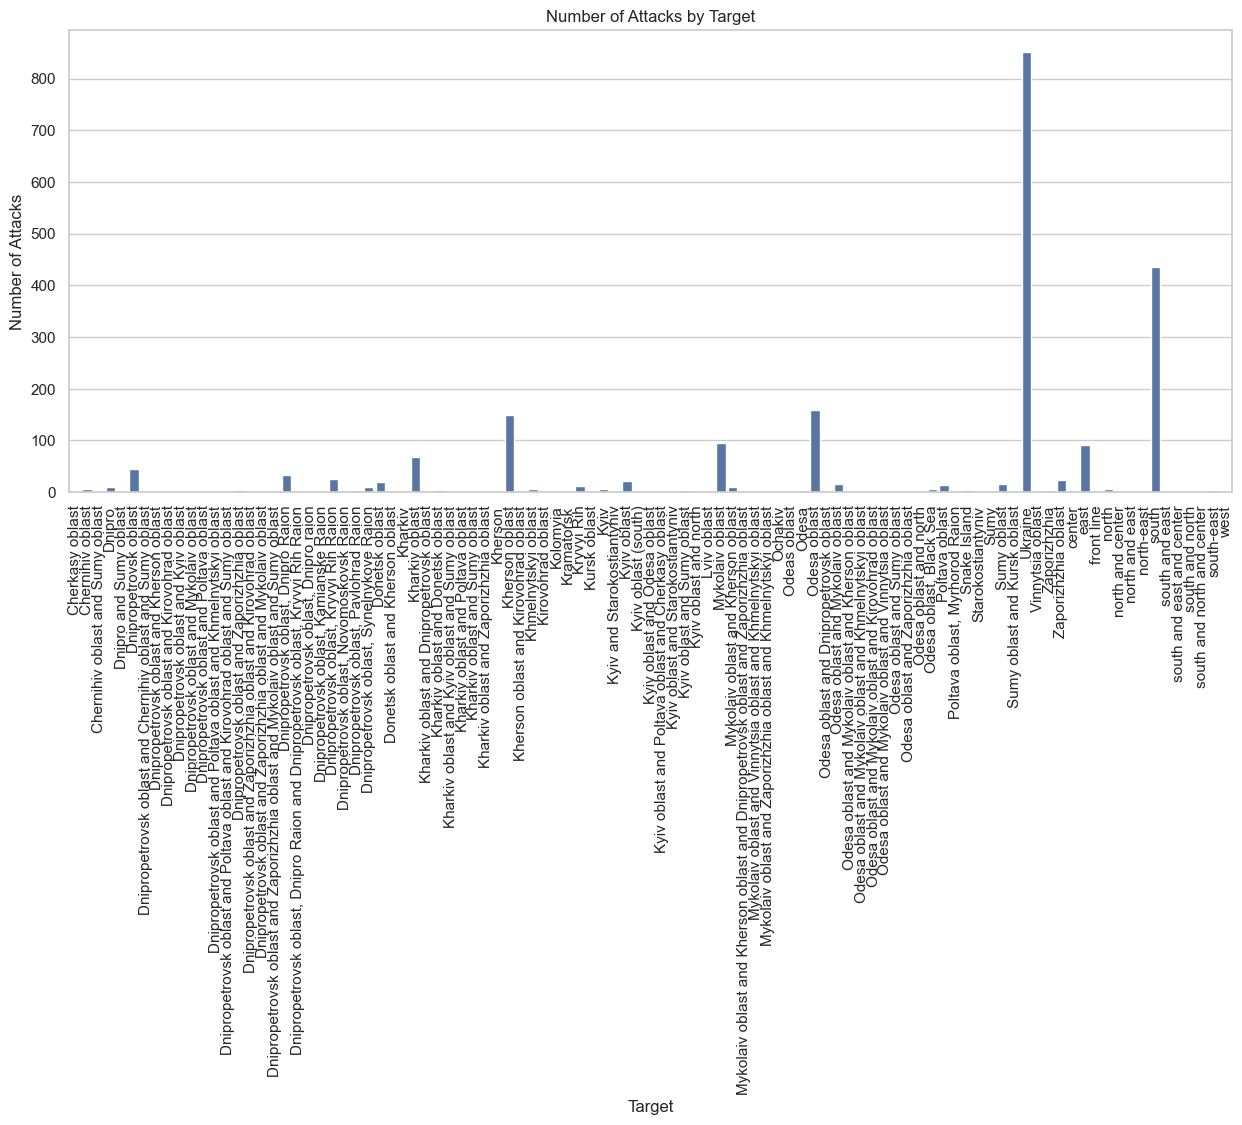

In [41]:
# Count the number of attacks by 'target'
target_counts = df['target'].value_counts()

# Plotting a bar chart for the number of attacks by target
plt.figure(figsize=(15, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Number of Attacks by Target')
plt.xlabel('Target')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Number_of_attacks_by_target.png', format='png', bbox_inches='tight')
plt.show()

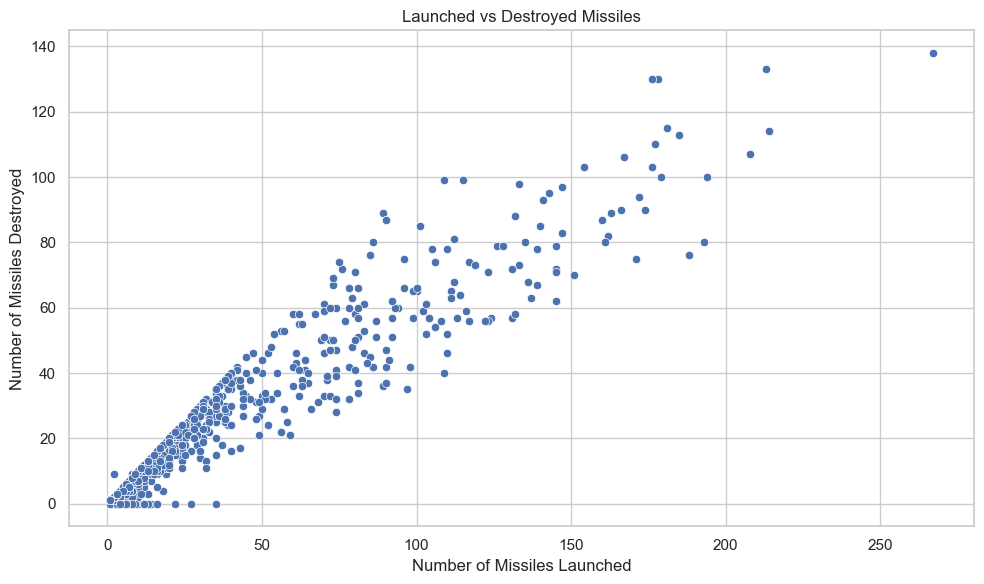

In [47]:
# Plotting a scatter plot between 'launched' and 'destroyed'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['launched'], y=df['destroyed'])
plt.title('Launched vs Destroyed Missiles')
plt.xlabel('Number of Missiles Launched')
plt.ylabel('Number of Missiles Destroyed')
plt.tight_layout()
plt.savefig('launch_vs_destroyed_missiles.png', format='png', bbox_inches='tight')
plt.show()

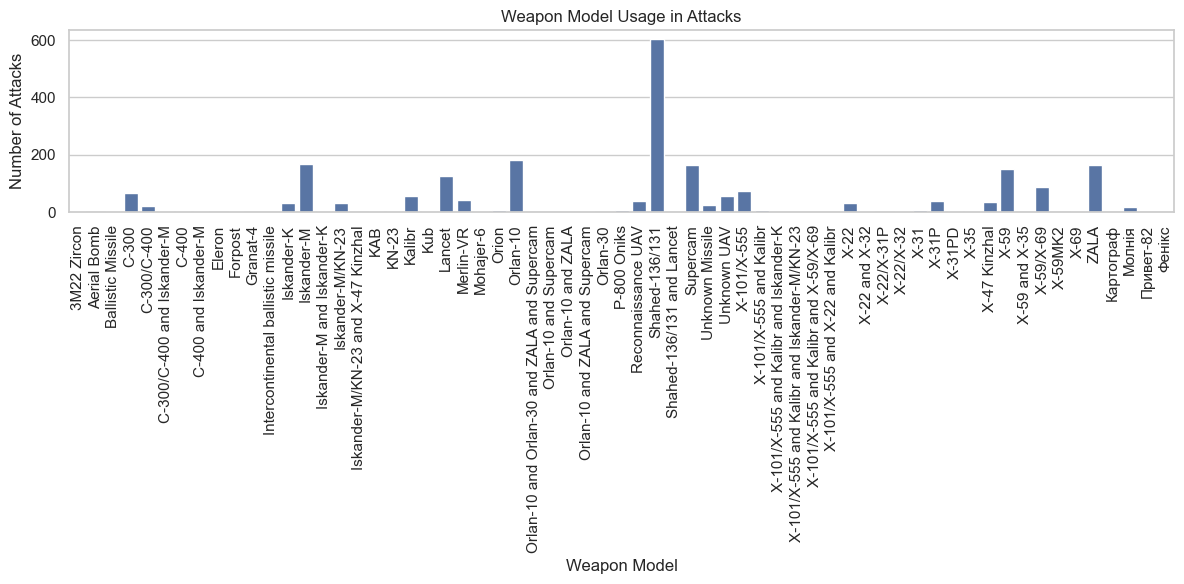

In [49]:
# Count the number of times each weapon model was used
model_counts = df['model'].value_counts()

# Plotting a bar chart for weapon models
plt.figure(figsize=(12, 6))
sns.barplot(x=model_counts.index, y=model_counts.values)
plt.title('Weapon Model Usage in Attacks')
plt.xlabel('Weapon Model')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('weapon_used_in_attack.png', format='png', bbox_inches='tight')
plt.show()

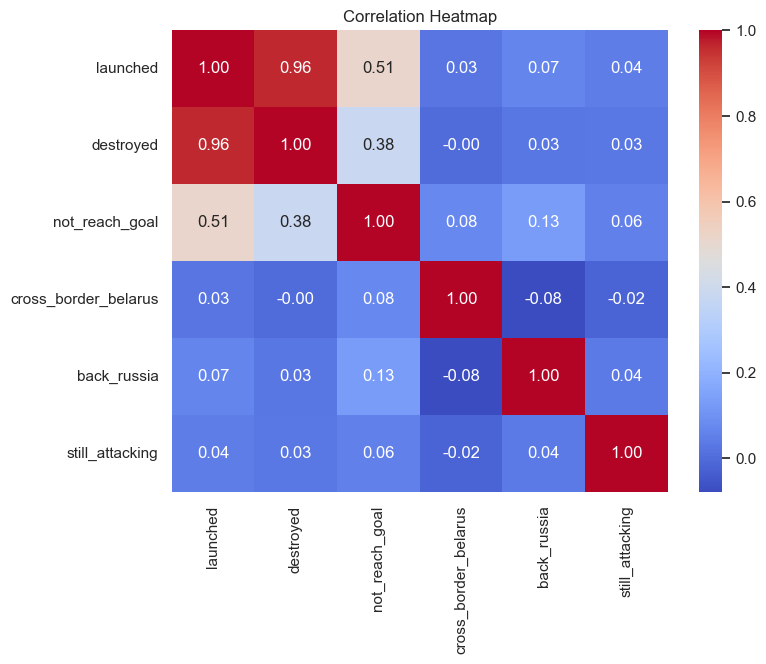

In [51]:
# Calculate the correlation matrix for numeric columns
correlation_matrix = df[['launched', 'destroyed', 'not_reach_goal', 'cross_border_belarus', 'back_russia', 'still_attacking']].corr()

# Plotting a heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout
plt.savefig('correlation_heatmap.png', format='png', bbox_inches='tight')
plt.show()

In [53]:
# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_missile_attacks.csv', index=False)